In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm_notebook as tqdm

from joblib import Parallel, delayed

/mnt/c/Users/hhelm/virtualenvs/hh/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
n_mc = 50 # number of simulation repititions

n_xor = 100
n_rxor = 100 # number of training samples 
thetas = np.arange(0, 180)
m = 1000 # number of test samples each monte carlo iteration
nR=30
d = 2

In [4]:
import pickle
# RXOR SWEEP DATA
mean_error_xor_rxor = pickle.load(open('data/gaussian-rxor-sweep/mean_error_rxor_sweep_nmc%i_nD%i_nxor%i_nrxor%i_m%i.pkl'%(n_mc, nR,
                                                                                                                         n_xor, n_rxor,
                                                                                                                         m),
                                      'rb'))
                                    

std_error_xor_rxor = pickle.load(open('data/gaussian-rxor-sweep/std_error_rxor_sweep_nmc%i_nD%i_nxor%i_nrxor%i_m%i.pkl'%(n_mc, nR,
                                                                                                                         n_xor, n_rxor,
                                                                                                                         m),
                                      'rb'))

mean_te_xor_rxor = pickle.load(open('data/gaussian-rxor-sweep/mean_te_rxor_sweep_nmc%i_nD%i_nxor%i_nrxor%i_m%i.pkl'%(n_mc, nR,
                                                                                                                         n_xor, n_rxor,
                                                                                                                         m),
                                      'rb'))

std_te_xor_rxor = pickle.load(open('data/gaussian-rxor-sweep/std_te_rxor_sweep_nmc%i_nD%i_nxor%i_nrxor%i_m%i.pkl'%(n_mc, nR,
                                                                                                                         n_xor, n_rxor,
                                                                                                                         m),
                                      'rb'))

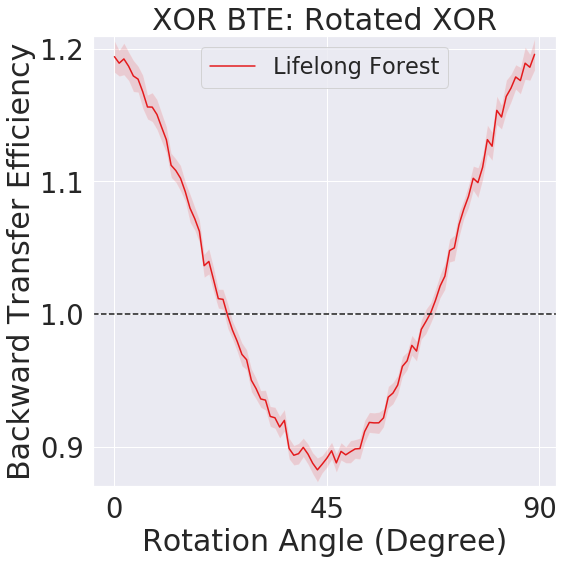

In [6]:
sns.set()
c = sns.color_palette('Set1')

fontsize=30
labelsize=27.5

mean_error = mean_te_xor_rxor
std_error = std_te_xor_rxor / np.sqrt(n_mc)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(np.arange(0, 90), mean_error[0][:90], c=c[0], label='Lifelong Forest')
ax.fill_between(np.arange(0, 90), 
        mean_error[0][:90] + 1.96*std_error[0][:90], 
        mean_error[0][:90] - 1.96*std_error[0][:90], 
        where=mean_error[0][:90] + 1.96*std_error[0][:90] >= mean_error[0][:90] - 1.96*std_error[0][:90], 
        facecolor=c[0], 
        alpha=0.15,
        interpolate=True)

ax.set_xlabel('Rotation Angle (Degree)', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
ax.set_title('XOR BTE: Rotated XOR', fontsize=fontsize)

ax.set_ylim(0.87, 1.21)
ax.set_yticks([0.9, 1, 1.1, 1.2])
ax.set_xticks([0, 45, 90]) #90, 180, 270, 359])
ax.tick_params(labelsize=labelsize)
ax.axhline(y=1, c='k', ls="--")
ax.legend(loc='upper center', fontsize=22.5)

plt.tight_layout()

plt.savefig('rotated-xor-lifelong-forests.pdf')
plt.savefig('rotated-xor-lifelong-forests.svg')
plt.savefig('rotated-xor-lifelong-forests.png', dpi=500)

In [7]:
# ROTATED CIFAR SWEEP DATA
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

import itertools
angles = np.arange(0,360,1)
cvs = np.arange(1,7)

iterable = itertools.product(cvs,angles)
l = len(angles)
mean_eta = np.zeros(l,dtype=float)

for count,angle in enumerate(angles):
    filename = 'rotated-cifar-lifelong-forests-results/LF'+'_'+str(angle)+'.pickle'
    err = unpickle(filename)
    
    mean_eta[count] = err[0]/err[1]

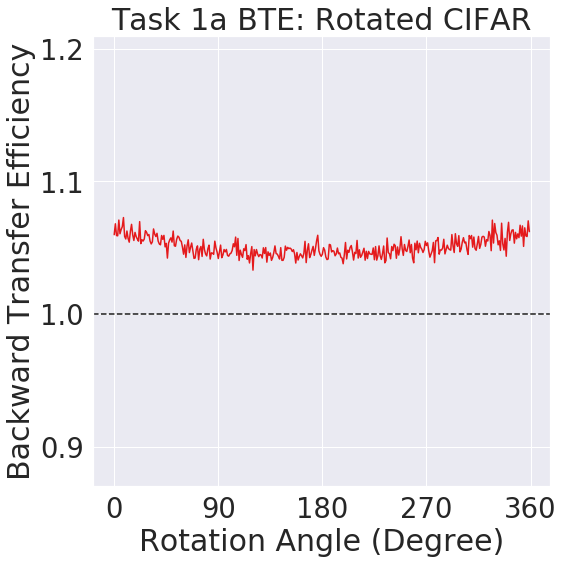

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(angles,mean_eta, c=c[0], label='Lifelong Forest')

#ax.set_yticks([1.0, 1.05, 1.1])
ax.tick_params(labelsize=20)
ax.set_xlabel('Rotation Angle (Degree)', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
ax.set_title('Task 1a BTE: Rotated CIFAR', fontsize=fontsize)

ax.set_ylim(0.87, 1.21)
ax.set_yticks([0.9, 1, 1.1, 1.2])
ax.set_xticks([0, 90, 180, 270, 360])
ax.tick_params(labelsize=labelsize)
ax.axhline(y=1, c='k', ls="--")

plt.tight_layout()

plt.savefig('rotated-cifar-lifelong-forests.pdf')
plt.savefig('rotated-cifar-lifelong-forests.svg')
plt.savefig('rotated-cifar-lifelong-forests.png', dpi=500)